In [2]:
#import pytorch
import torch
from torch import nn
import torchvision
#import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
#import matplotlib for visualization
import matplotlib.pyplot as plt


In [3]:
from torchvision import datasets
train_data=datasets.FashionMNIST(root='data',
                                 train=True,
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(),
                                 target_transform=None
                            )

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.4MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 275kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.90MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
test_data=datasets.FashionMNIST(root='data',
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
#first training example
image,label=train_data[0]
image.shape,label


(torch.Size([1, 28, 28]), 9)

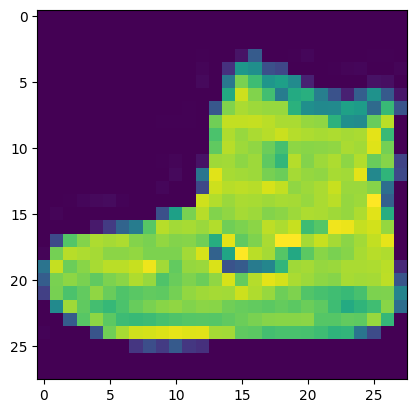

In [10]:
import matplotlib.pyplot as plt
image,label=train_data[0]
plt.imshow(image.squeeze())
plt.show()

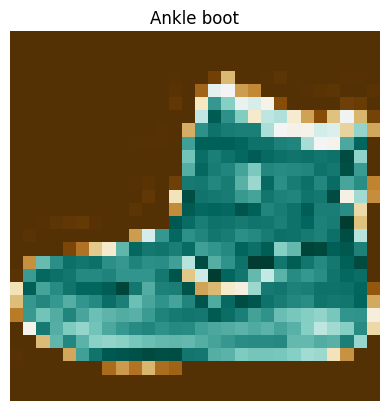

In [11]:
plt.imshow(image.squeeze(),cmap='BrBG')
plt.title(class_names[label])
plt.axis(False)
plt.show()

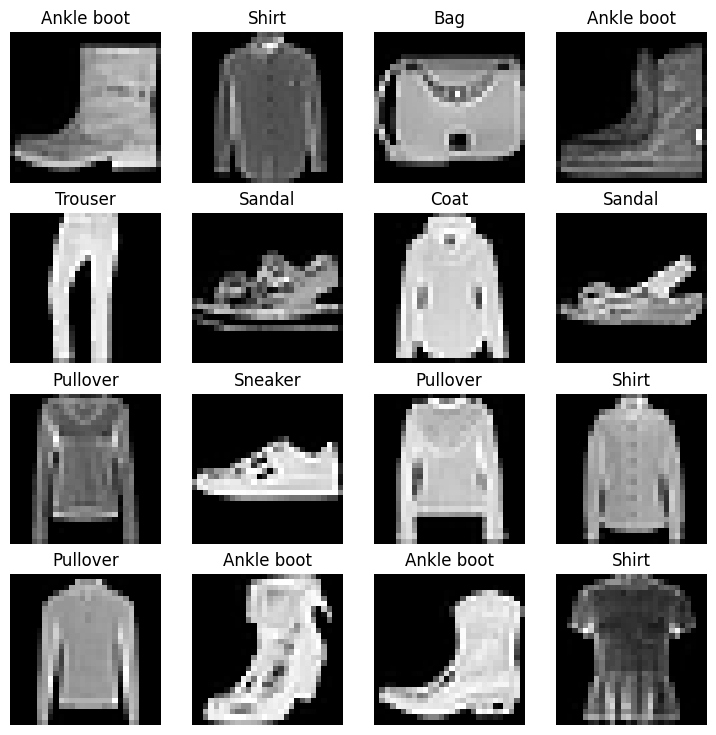

In [12]:
#to plot multiple images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_ind=torch.randint(0,len(train_data),(1,)).item()
  image,label=train_data[random_ind]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap='grey')
  plt.title(class_names[label])
  plt.axis(False)
plt.show()


In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)
train_dataloader,test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x79d9eebd3310>,
 <torch.utils.data.dataloader.DataLoader at 0x79d9eec7b590>)

In [14]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [15]:
#check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size:torch.Size([1, 28, 28])
label:6,label size:torch.Size([])


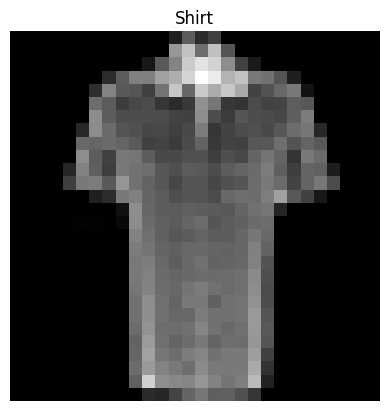

In [16]:
#show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),(1,)).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"image size:{img.shape}")
print(f"label:{label},label size:{label.shape}")


In [17]:
#baseline model
#create a flatten layer
flatten_model=nn.Flatten()
#create a single sample
x=train_features_batch[0]
#flatten the sample
output=flatten_model(x)
output.squeeze().shape

torch.Size([784])

In [18]:
#base model
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)

    )
  def forward(self,x):
    return self.layer_stack(x)




In [19]:
torch.manual_seed(42)
#set up model with input parameters
model0=FashionMNISTModel(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names))
model0


FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x=torch.rand([1,1,28,28])
model0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [22]:
import requests
from pathlib import Path
#download helper functions
if Path('helper_functions.py').is_file():
  print("already eists")
else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)


downloading


In [23]:
#import accuracy metric
from helper_functions import accuracy_fn
#set up and loss and optimize parameters
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)


In [24]:
from tqdm import tqdm
for i in tqdm(range(10)):
  if i==9:
    break

 90%|█████████ | 9/10 [00:00<00:00, 70034.76it/s]


In [25]:
#how much time will model take
import timeit
from timeit import default_timer as timer
def print_time(start,end):
  return end-start
start_time=timer()
for _ in range(10):
  print('satya')
end_time=timer()
print(print_time(start_time,end_time))


satya
satya
satya
satya
satya
satya
satya
satya
satya
satya
0.0004885390001163614


In [26]:
#training and testing loops
torch.manual_seed(42)
train_time_start=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch{epoch}\n")
  train_loss=0
  model0.train()
  for batch,(image,label) in enumerate(train_dataloader):

    y_pred=model0(image)
    loss=loss_fn(y_pred,label)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)
  #testing
  test_loss,test_acc=0,0
  model0.eval()
  with torch.inference_mode():
    for image,label in test_dataloader:
      test_pred=model0(image)
      test_loss+=loss_fn(test_pred,label)
      test_acc+=accuracy_fn(y_true=label,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\ntrain loss:{train_loss:.4f} |test loss:{test_loss:.4f} ,test acc:{test_acc:.4f}")
train_time_end=timer()
print(f"\ntrain time:{print_time(train_time_start,train_time_end)}")






  0%|          | 0/3 [00:00<?, ?it/s]

epoch0

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


 33%|███▎      | 1/3 [00:11<00:23, 11.93s/it]


train loss:0.5904 |test loss:0.5095 ,test acc:82.0387
epoch1

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


 67%|██████▋   | 2/3 [00:22<00:11, 11.31s/it]


train loss:0.4763 |test loss:0.4799 ,test acc:83.1969
epoch2

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


100%|██████████| 3/3 [00:33<00:00, 11.31s/it]


train loss:0.4550 |test loss:0.4766 ,test acc:83.4265

train time:33.929156004000106


In [32]:
#making predictions and get model0 results
torch.manual_seed(42)
def eval_mode(model,data_loader,loss_fn,accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for image,label in tqdm(data_loader):
      pred=model(image)
      loss+=loss_fn(pred,label)
      acc+=accuracy_fn(y_true=label,y_pred=pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss,
          "model_acc":acc}




In [33]:
model0_results=eval_mode(model=model0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model0_results

100%|██████████| 313/313 [00:01<00:00, 214.59it/s]


{'model_name': 'FashionMNISTModel',
 'model_loss': tensor(0.4766),
 'model_acc': 83.42651757188499}

In [34]:
#use non-linear functions
class FashionMNISTModel2(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()

    )
  def forward(self,x):
    return self.layer_stack(x)
model1=FashionMNISTModel2(input_shape=784,hidden_units=10,output_shape=len(class_names))
model1

FashionMNISTModel2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [35]:
#setup loss function and optimization parameters
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss() #measure how wrong our model is
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)#try to update the model parameters to reduce lass


In [37]:
#training and testing loop
torch.manual_seed(42)
train_time_start=timer()
epochs=5
for epoch in tqdm(range(epochs)):
  print(f"epoch{epoch}\n")
  train_loss=0
  model0.train()
  for batch,(image,label) in enumerate(train_dataloader):
    y_pred=model1(image)
    loss=loss_fn(y_pred,label)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)
  #testing
  test_loss,test_acc=0,0
  model0.eval()
  with torch.inference_mode():
    for image,label in test_dataloader:
      test_pred=model1(image)
      test_loss+=loss_fn(test_pred,label)
      test_acc+=accuracy_fn(y_true=label,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\ntrain loss:{train_loss:.4f} |test loss:{test_loss:.4f} ,test acc:{test_acc:.4f}")
train_time_end=timer()
print(f"\ntrain time:{print_time(train_time_start,train_time_end)}")


  0%|          | 0/5 [00:00<?, ?it/s]

epoch0

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


 20%|██        | 1/5 [00:11<00:44, 11.19s/it]


train loss:0.6567 |test loss:0.7177 ,test acc:74.2013
epoch1

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


 40%|████      | 2/5 [00:21<00:32, 10.68s/it]


train loss:0.6455 |test loss:0.6893 ,test acc:74.9002
epoch2

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


 60%|██████    | 3/5 [00:32<00:21, 10.77s/it]


train loss:0.6370 |test loss:0.6899 ,test acc:75.1198
epoch3

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


 80%|████████  | 4/5 [00:43<00:10, 10.79s/it]


train loss:0.6301 |test loss:0.6591 ,test acc:75.3694
epoch4

looked at 0/60000 samples
looked at 400/60000 samples
looked at 800/60000 samples
looked at 1200/60000 samples
looked at 1600/60000 samples


100%|██████████| 5/5 [00:54<00:00, 10.87s/it]


train loss:0.6273 |test loss:0.6748 ,test acc:75.2196

train time:54.349620843000594


In [40]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [41]:
model1_results=eval_mode(model=model1,
                         data_loader=test_dataloader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn)
model1_results

100%|██████████| 313/313 [00:01<00:00, 200.42it/s]


{'model_name': 'FashionMNISTModel2',
 'model_loss': tensor(0.6748),
 'model_acc': 75.21964856230032}